In [2]:
queryDt=0


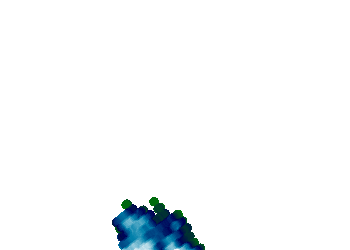

220829225050


In [3]:
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.simplefilter("ignore")
refDt=datetime.datetime.now()
delta=datetime.timedelta(minutes=queryDt)
queryTime=refDt+delta
querystr=queryTime.strftime("%y%m%d%H%M%S")
def find_nearest_idx(array,value):
    array=np.asarray(array)
    idx=(np.abs(array-value)).argmin()
    return idx
aklFiles=glob.glob('radar_*.png')
aklList=[]
for file in aklFiles:
    m=re.search('radar_(\\d+).png',file)
    aklList.append(int(m.group(1)))
aklList.sort()
endIdx=find_nearest_idx(aklList,int(querystr))
akldt=aklList[endIdx]
import folium
from IPython.display import HTML
m1 = folium.Map(location=[-37.0428, 175.6819], zoom_start=12)
img = folium.raster_layers.ImageOverlay(
        name="Rain Radar Reflectance",
        image=f'radar_{akldt}.png',
        bounds=[[-36.8428, 175.30819],[-37.2428, 175.9819]],
        opacity=0.6,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )
img.add_to(m1)
folium.LayerControl().add_to(m1)
display(HTML(m1._repr_html_()))